# COGS 108 - UCSD Grade Inflation

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Sirui Huang
- Tianqi Li
- Jacob Mccoy
- Shreya Nagunuri
- Juliet Raynovich

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Using CAPES data, has there been a trend of grade inflation at UCSD over the past 15 years? If so, has grade inflation been more prominent in particular departments more than others. In this research question, we would like to study a department's average grade over time.

## Background and Prior Work

Grade inflation is a reference to the trend of increasin grade over time, in this case, at universities. Experts find grade inflation to be a significant issue in society because it signals that students shouldn't try as hard to get the grade that they deserve.1 In addition, it may signal to employers that students are not prepared to leave their learning and join the workforce.1 Thus, universities try to curb the impact of grade inflation by grading on a curve and reducing the number of As given much to the chargin of students. This system was created in hopes for students feel as if they deserved their grade more, although someone has to fill the lower quota of students.2

There hasn't been much research on grade inflation at UCSD especially on a department level. However, we do know that the average GPA of UCSD students has increased from 2000 to 2015 from a 3.0 to a 3.153. This analysis is limited to an overall perspective and we don't know if a particular department drives this growth. In addition, this increase may not even be attributed to grade inflation but the growth of UCSD to a more prestigious university. 4 There has been research done on grade inflation on a national level and some researchers find that "grades have risen at high schools and dropped at four-year colleges, in general, and selective four-year institutions, in particular". This heavily contridicts previous reporting most likely because this research paper defines grade inflation as the "signalling power of grades".5

Our research aims to build on previous research in a couple different ways. Firstly, our research would include more recent student grades from Fall Quarter 2023. In addition, we would aim to understand inflation on a departmental level since there many be specific departments that award higher grades every year compared to other departments.

# Hypothesis


Grade inflation at UCSD (from 2007 Summer Session to 2023 Spring) has become more prominent specifically in the humanties departments.

The reason why we think that grade inflation has increased at UCSD because grade inflation has been a trend in other top universities like the Ivy Leagues. In order to keep up with the competition, other universities like the UC system, including UCSD have implemented systems to increase grades. In addition, due to COVID-19 online resources like Chat-GPT and Chegg have become more common which has lead to the democratization of information. We believe that this results in students doing better in class and thus increasing grades. The reason why we suspect this to be the case in the humanities departments is because those classes have become more labor based instead of based on a specific criteria. Writing classes at UCSD have become more forgiving in writing standards in order to become a more inclusive place for ideas and growth.

# Data

## Data overview

Dataset Name: UCSD CAPEs Data Link: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes/data Number of observations: 63363 observations about the data Number of Variables: 11

The UCSD CAPEs Dataset has 11 different variables that consist of the questions that students answer when filling out the CAPEs end of the year form. The variable names are Instructor, Course, Quarter, Total Enrolled in Course, Total CAPEs Given, Percentage Recommended Class, Percentage Recommended Professor, Study Hours per Week, Average Grade Expected, Average Grade Received, and Evalulation URL. The column Course refers to the particular course number with the name of the course (ie. AAS 10 - Intro/African-American Studies) as a string. The Average Grade Expected and Average Grade Received are all string columns that provide the letter grade and a GPA version of the grade. In addition, Study Hours per Week column is a float number that describes the average number of hours students spent studying that week.

The average grade recieved and expected is also important to study grade inflation at UCSD because without it we don't know what exactly the scores students are recieving. The number of hours studied per week for a class is also important because with it we can determine what may be the cause of grade inflation if it exists.

Fortunately, the data is clean enough because the data came from a form that students should fill in and most of the data is a drop down, a multiple choice question, or autofilled from the student's academic record. For the preprocessing, we need to drop all rows that have a n/a value for Average Grade Expected and Average Grade Received since without it you can't create a proper GPA for that course. Next we need to drop unnecessary columns and switch datatypes for the GPA columns for easier calculation.

## UCSD CAPEs

In [258]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('capes_data.csv')
df.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Evalulation URL
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN,https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...


Here we will not use the Evaluation URL column in our analysis, and we will be dropping any rows missing values in the Average Grade Received,  Average Grade Expected, and Study Hours per Week columns in order to ensure data cleanliness, therefore:

In [259]:
df = df.drop(columns = "Evalulation URL")
cols = ["Average Grade Received", "Average Grade Expected", "Study Hours per Week"]
drop_empty=df.dropna(subset=cols, how = "any")
drop_empty.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67)
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92)
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07)
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00)
5,Hrvoj Mihic Branka,ANBI 111 - Human Evolution (A),SP23,22,4,100.0%,100.0%,2.50,A (4.00),B- (2.95)


## DATA Cleaning:

We want the 'Average Grade Received' column to exclusively contain numeric values. Additionally, we will add an additional column in order to categorize these courses into years instead of quarters which will make it easier to visualize the data. 

In [260]:
def standardize_avggrade(string):
    in_brackets = False
    current_substring = ""
    count = 0
 
    for c in string:
        if c == '(':
            in_brackets = True
        elif c == ")" and in_brackets:
            in_brackets = False
        elif in_brackets:
            current_substring += c
    
    return float(current_substring)

def standardize_year(string):
    current_substring = ""
    return int(string[2:4])
            
    return int(current_substring)

drop_empty['Avg Int Grade Received'] = drop_empty['Average Grade Received'].apply(standardize_avggrade)
drop_empty['Year'] = drop_empty['Quarter'].apply(standardize_year)
drop_empty.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Avg Int Grade Received,Year
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),3.67,23
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),3.92,23
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),3.07,23
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),4.00,23
5,Hrvoj Mihic Branka,ANBI 111 - Human Evolution (A),SP23,22,4,100.0%,100.0%,2.50,A (4.00),B- (2.95),2.95,23


Additionally, since we want to check the differences between departments, we extract the course code from the 'Course' column, since it can serve as a representation of the departments.

In [261]:
def get_department(string):
    current_substring = ""
    return string[0:4].strip()

drop_empty['Department'] = drop_empty['Course'].apply(get_department)
drop_empty = drop_empty.drop(columns = "Course")
drop_empty.head()

,Instructor,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Avg Int Grade Received,Year,Department
0,Butler Elizabeth Annette,SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),3.67,23,AAS
1,Butler Elizabeth Annette,SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),3.92,23,AAS
3,Shtienberg Gilad,SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),3.07,23,ANAR
4,Braswell Geoffrey E.,SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),4.00,23,ANAR
5,Hrvoj Mihic Branka,SP23,22,4,100.0%,100.0%,2.50,A (4.00),B- (2.95),2.95,23,ANBI


Here, we examine the grades assigned by each department from 2007 to 2023. However we limit the departments we look at those with enough iterations to generate meaningful results (8 or more iterations). Our new dataframe will contain the name of the department and the average grade given for that year. 

In [264]:
average_grade_df = drop_empty.groupby(['Year', 'Department'])['Avg Int Grade Received'].mean().reset_index()
average_grade_df["Year"] = average_grade_df["Year"] - 7
department_counts = average_grade_df['Department'].value_counts()
selected_departments = department_counts[department_counts >= 8].index
departments = []
for department in selected_departments:
    departments.append(department)
average_grade_df = average_grade_df[average_grade_df['Department'].isin(departments)]
average_grade_df.head()

,Year,Department,Avg Int Grade Received
0,0,ANAR,2.610000
1,0,ANBI,3.040000
2,0,ANSC,3.090000
3,0,ANTH,2.906667
4,0,BENG,3.377143


Here we do the same cleaning for the Grade Expected, which would be the comparison to the actual grades.

In [266]:
drop_empty['Avg Int Grade Expected'] = drop_empty['Average Grade Expected'].apply(standardize_avggrade)

In [268]:
average_grade_exp_df = drop_empty.groupby(['Year', 'Department'])['Avg Int Grade Expected'].mean().reset_index()
average_grade_exp_df["Year"] = average_grade_exp_df["Year"] - 7
department_counts = average_grade_exp_df['Department'].value_counts()
selected_departments = department_counts[department_counts >= 8].index
departments = []
for department in selected_departments:
    departments.append(department)
average_grade_exp_df = average_grade_exp_df[average_grade_exp_df['Department'].isin(departments)]
average_grade_exp_df.head()

,Year,Department,Avg Int Grade Expected
0,0,ANAR,3.120000
1,0,ANBI,3.375000
2,0,ANSC,3.545000
3,0,ANTH,3.360000
4,0,BENG,3.581429


Next, we will create a clean dataframe only containing the name of the department and the average number of hours studied per week for that year in that department. The year column will be reset from 0 instead of from 7. 

In [270]:
average_hours_studied = drop_empty.groupby(['Year', 'Department'])['Study Hours per Week'].mean().reset_index()
average_hours_studied["Year"] = average_hours_studied["Year"] - 7
average_hours_studied.head()

,Year,Department,Study Hours per Week
0,0,ANAR,4.410000
1,0,ANBI,3.900000
2,0,ANSC,4.615000
3,0,ANTH,4.073333
4,0,BENG,6.475714


## EDA

In this section we will be examining distributions of our variables and if there any outliers in our columns. 

Below, we can see the list of all the departments contained in our dataset. 

In [223]:
drop_empty['Department'].unique()

array(['AAS', 'ANAR', 'ANBI', 'ANSC', 'ANTH', 'AWP', 'BENG', 'BIBC',
       'BICD', 'BIEB', 'BILD', 'BIMM', 'BIPN', 'BISP', 'CAT', 'CENG',
       'CGS', 'CHEM', 'CHIN', 'COGS', 'COMM', 'CSE', 'CSS', 'DOC', 'DSC',
       'DSGN', 'ECE', 'ECON', 'EDS', 'ENG', 'ENVR', 'ESYS', 'ETHN',
       'FMPH', 'GLBH', 'HDS', 'HIAF', 'HIEA', 'HIEU', 'HIGL', 'HILA',
       'HILD', 'HINE', 'HISC', 'HITO', 'HIUS', 'HUM', 'INTL', 'JAPN',
       'LATI', 'LIGN', 'LIHL', 'LTAM', 'LTEA', 'LTEN', 'LTEU', 'LTKO',
       'LTLA', 'LTSP', 'LTWL', 'LTWR', 'MAE', 'MATH', 'MGT', 'MMW', 'MUS',
       'NANO', 'PHIL', 'PHYS', 'POLI', 'PSYC', 'RELI', 'SE 1', 'SE 3',
       'SE 9', 'SIO', 'SOCI', 'SYN', 'TDAC', 'TDDE', 'TDDR', 'TDGE',
       'TDHT', 'TDMV', 'TDPF', 'TDPR', 'TDTR', 'USP', 'VIS', 'WCWP',
       'CCS', 'GSS', 'LTCH', 'LTTH', 'LTCS', 'LTGK', 'LTGM', 'TDDM',
       'LAWS', 'ERC', 'TDPW', 'JWSP', 'LTFR', 'LTRU', 'HMNR', 'TWS',
       'LTIT', 'HDP', 'ELWR', 'FPMU', 'ICAM', 'SE 2', 'TDHD', 'JUDA',
       'COCU', '

Our first question in our hypothesis is to understand whether or not grade inflation exists at UCSD. We can do this looking at the trends for each department at UCSD with 8 or more iterations of classes. 

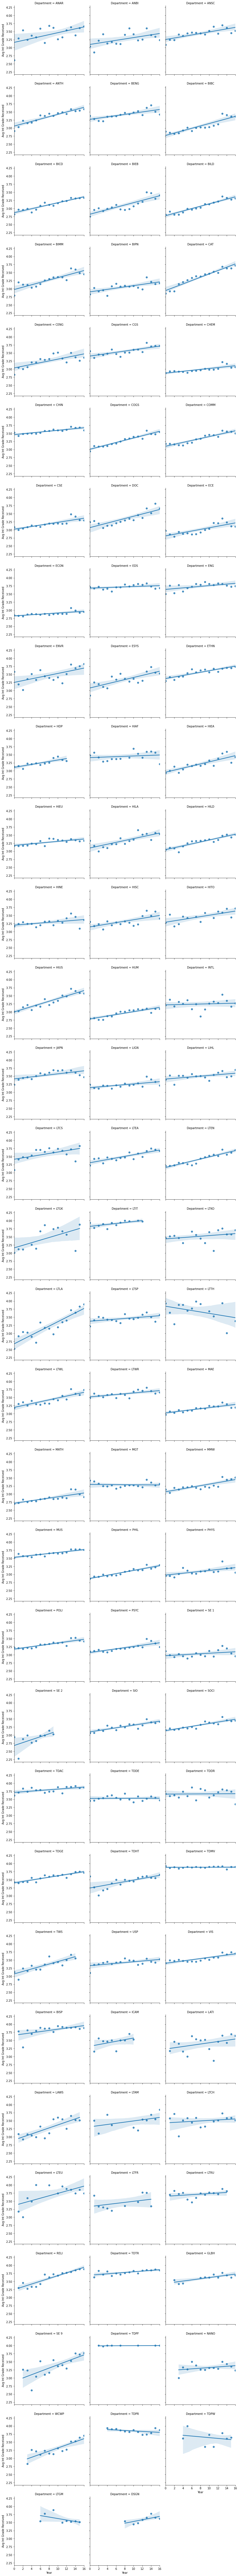

In [225]:
department_graphs = sns.FacetGrid(average_grade_df, col="Department", col_wrap=3, height=4)

department_graphs.map(sns.regplot, 'Year', 'Avg Int Grade Received')

plt.show()

We can clearly see visually that GPAs for most departments at UCSD seem to be on the rise. We can picture this even further by looking at the slopes for each of these departments. 

In [226]:
dept_slopes = pd.DataFrame()
deps = average_grade_df["Department"].values.tolist()
for dept in deps:
    temp_df = average_grade_df[(average_grade_df["Department"] == dept)]
    x = temp_df["Year"]
    y = temp_df["Avg Int Grade Received"]
    x1 = sm.add_constant(x)
    res_1 = sm.OLS(y, x1).fit()
    df_temp = pd.DataFrame({"dep": [dept], "slope": [res_1.params[1]]})
    dept_slopes = pd.concat([dept_slopes, df_temp], ignore_index=True)

In [227]:
dept_slopes = dept_slopes.drop_duplicates()
dept_slopes.sort_values(by=['slope'], ascending=[False])

,dep,slope
48,LTLA,0.068503
11,CAT,0.051677
236,SE 9,0.051161
338,WCWP,0.048084
118,LAWS,0.046619
...,...,...
55,MGT,-0.001071
425,TDPR,-0.007381
426,TDPW,-0.012204
50,LTTH,-0.022191


From this we see that the LTLA department has been most affected by grade inflation since on average GPAs increase by .0685 every year. In contrast, the department least affected by grade inflation is the LTGM department which actually has grade DEFLATION. Each year, on average, GPAs in the LTGM department decrease by 0.0228 which is how we know there is some grade deflation at UCSD from 2007 to 2023. 

In [228]:
dept_slopes['slope'].median()

0.020838192306928037

In [229]:
dept_slopes['slope'].describe()

count    95.000000
mean      0.020842
std       0.015110
min      -0.022813
25%       0.011649
50%       0.020838
75%       0.029894
max       0.068503
Name: slope, dtype: float64

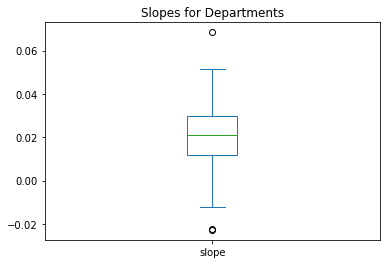

In [230]:
dept_slopes['slope'].plot(kind='box', title='Slopes for Departments') 
plt.show() 

By looking at the median, we can see that, on average, grades have been increasing by .02 each year. However we also do see that some departments have slopes that are decreasing which means there is grade deflation for some departments. 

Now, we will explore the hours studied for each class and its distributions!

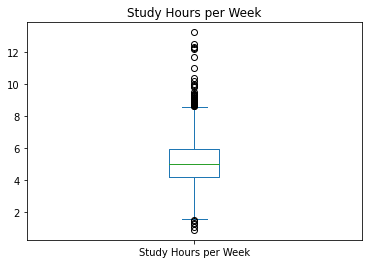

In [271]:
average_hours_studied['Study Hours per Week'].plot(kind='box', title='Study Hours per Week') 
plt.show() 

In [273]:
average_hours_studied['Study Hours per Week'].describe()

count    1643.000000
mean        5.177370
std         1.557317
min         0.900000
25%         4.182589
50%         4.985517
75%         5.960385
max        13.230000
Name: Study Hours per Week, dtype: float64

We can see through this distribution that there are many outliers in this section. Even though the mean of this dataset is 5.18 hours a week, we can see that there is a max of 13.23 hours and a minimum of .9 hours a week. In addition, we can see through the visialization that there exists many data points outside the 25th and 75th percentiles. With analysis included below we will see if this distribution matches grade inflation. 

### Grade Inflation: Humanities VS STEM 

Now we know that grade inflation exists at UCSD, let's do some analysis on what may be a driving factor in grade inflation. Our first analysis will be on differences in grade inflation between STEM and Humanities departments at UCSD. 

We will split the departments by their classification in which HUM_Department_Enroll will contain humanities departments and STEM_Department_Enroll will contain STEM departments. 

In [231]:
HUM_Departments = ['ANAR', 'LTWR', 'HUM', 'INTL', 'JAPN', 'LIGN', 'LIHL', 'LTEA', 'LTEN','VIS', 'USP', 'LTLA','LTSP', 'TDMV', 'LTWL', 'TDGE', 'MGT', 'MMW', 'MUS', 'PHIL','POLI', 'PSYC', 'TDHT','SOCI', 'TDAC', 'TDDE', 'HIUS', 'HISC', 'HINE','CHIN','CGS', 'CAT', 'COMM', 'ANTH', 'ANSC', 'COGS', 'CSE', 'ETHN', 'ESYS', 'HILD', 'HILA', 'HIEU', 'HIEA', 'DOC', 'TDDR', 'ENVR', 'ENG', 'EDS', 'TDTR', 'RELI', 'LATI', 'LTKO', 'HIAF', 'LTCS','LAWS', 'LTCH', 'TWS', 'HITO', 'LTRU', 'LTTH', 'WCWP', 'LTEU', 'TDPR', 'LTGK', 'HDP', 'LTIT', 'GLBH', 'LTAM', 'LTFR','TDPF', 'TDPW', 'LTGM', 'DSGN']
STEM_Departments = ['ANBI', 'MAE', 'MATH', 'PHYS','SE 1', 'SIO', 'BIMM', 'CHEM', 'CENG', 'BIPN', 'BILD', 'BIEB', 'BICD', 'BIBC', 'BENG', 'ECE', 'BISP', 'SE 9','NANO', 'SE 2', 'ICAM', 'ECON']

In [232]:
STEM_CAPE = drop_empty[drop_empty['Department'].isin(STEM_Departments)]
HUM_CAPE = drop_empty[drop_empty['Department'].isin(HUM_Departments)]
STEM_CAPE.reset_index(drop=True, inplace=True)
HUM_CAPE.reset_index(drop=True, inplace=True)

In [233]:
STEM_CAPE.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Avg Int Grade Received,Year,Department,Avg Int Grade Expected
0,Hrvoj Mihic Branka,ANBI 111 - Human Evolution (A),SP23,22,4,100.0%,100.0%,2.50,A (4.00),B- (2.95),2.95,23,ANBI,4.00
1,Hrvoj Mihic Branka,ANBI 140 - Evolution of Human Brain (A),SP23,36,12,63.6%,72.7%,6.17,B (3.00),C+ (2.53),2.53,23,ANBI,3.00
2,Wilder Linnea Lorene,ANBI 173 - How Monkeys See the World (A),SP23,20,6,83.3%,83.3%,4.83,B+ (3.50),B+ (3.51),3.51,23,ANBI,3.50
3,Alexandrov Ludmil B,BENG 100 - Intro to Prob & Stats for BENG (A),SP23,132,70,61.5%,86.2%,6.56,B (3.03),B (3.03),3.03,23,BENG,3.03
4,Fraley Stephanie I.,BENG 103B - Bioengineering Mass Transfer (A),SP23,128,86,75.0%,94.0%,8.60,B (3.22),B (3.09),3.09,23,BENG,3.22


In [234]:
HUM_CAPE.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Avg Int Grade Received,Year,Department,Avg Int Grade Expected
0,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),3.07,23,ANAR,3.50
1,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),4.00,23,ANAR,4.00
2,Sloane Julia Kathryn,ANSC 101 - Aging: Culture&Health/Hum Dev (A),SP23,38,12,91.7%,100.0%,3.17,A- (3.75),A- (3.75),3.75,23,ANSC,3.75
3,Stewart Alexander B,ANSC 105 - Global Health and Inequality (A),SP23,30,20,95.0%,100.0%,3.45,A- (3.79),B+ (3.67),3.67,23,ANSC,3.79
4,Yeh Rihan Wen Xin,ANSC 122 - Language in Society (A),SP23,26,8,75.0%,87.5%,5.50,B+ (3.57),B- (2.88),2.88,23,ANSC,3.57


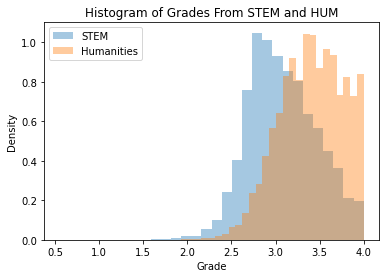

In [235]:
STEM_RECEIVED = STEM_CAPE['Avg Int Grade Received']
HUM_RECEIVED = HUM_CAPE['Avg Int Grade Received']
plt.hist(STEM_RECEIVED, alpha = 0.4, label = "STEM_RECEIVED", density = True, bins = 30)
plt.hist(HUM_RECEIVED, alpha = 0.4, label = "HUM_RECEIVED", density = True, bins = 30)
plt.title("Histogram of Grades From STEM and HUM")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.legend(labels=['STEM', 'Humanities'])

Here, we can see that the overall grades given by HUM departments have a notable contrast with those of the STEM departments. Specifically, the distribution of grades and the peaks in each category. Within STEM departments, the peak grade range falls between 2.5 to 3, showing that there is a moderate level of performance across the STEM disciplines. On the other hand, the peak of HUM is slightly higher, ranging between 3 to 3.5; and implying that students in HUM receive grades that are slightly higher than those who are in STEM disciplines. This prompts further investigation into the factors contributing to the differences in grading practices between STEM and HUM departments, which may be a result of various reasons.

In [236]:
#Check the mean score each year
STEM_GRA = STEM_CAPE.groupby(['Year'])['Avg Int Grade Received'].mean().reset_index()
HUM_GRA = HUM_CAPE.groupby(['Year'])['Avg Int Grade Received'].mean().reset_index()

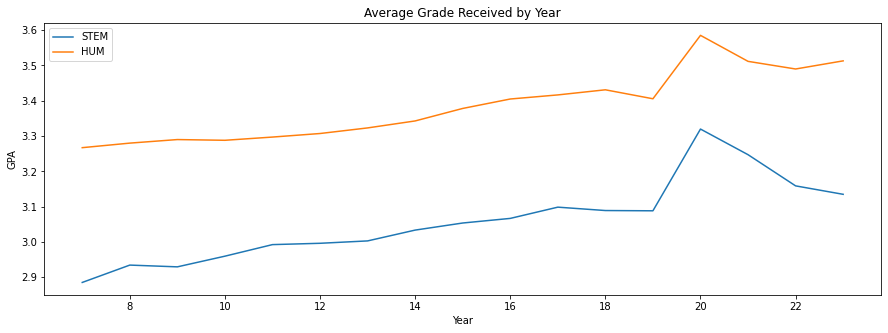

In [237]:
STEM_CAPE.groupby(['Year'])['Avg Int Grade Received'].mean().plot(figsize = (15, 5))
HUM_CAPE.groupby(['Year'])['Avg Int Grade Received'].mean().plot(figsize = (15, 5))
plt.title('Average Grade Received by Year')
plt.xlabel('Year')
plt.ylabel('GPA')
plt.legend(labels=['STEM', 'HUM'])

plt.show()

Both STEM and HUM have maintained a relatively steady increase in average grades with the exception of the period of 2019 - 2020, followed by a large dip. There is a stark difference between STEM and Humanities classes in what happens after 2020. Specifically, after 2020 for humanities departments, there is a slight increase that shows that grade inflation continues. However in the STEM departments we can see that the mean grades for STEM departments may actually be decreasing. In order to delve deeper into these trends, we can examine the box plots which serves to identify outliers, variations, and patterns that may help to shed light on these numbers. 

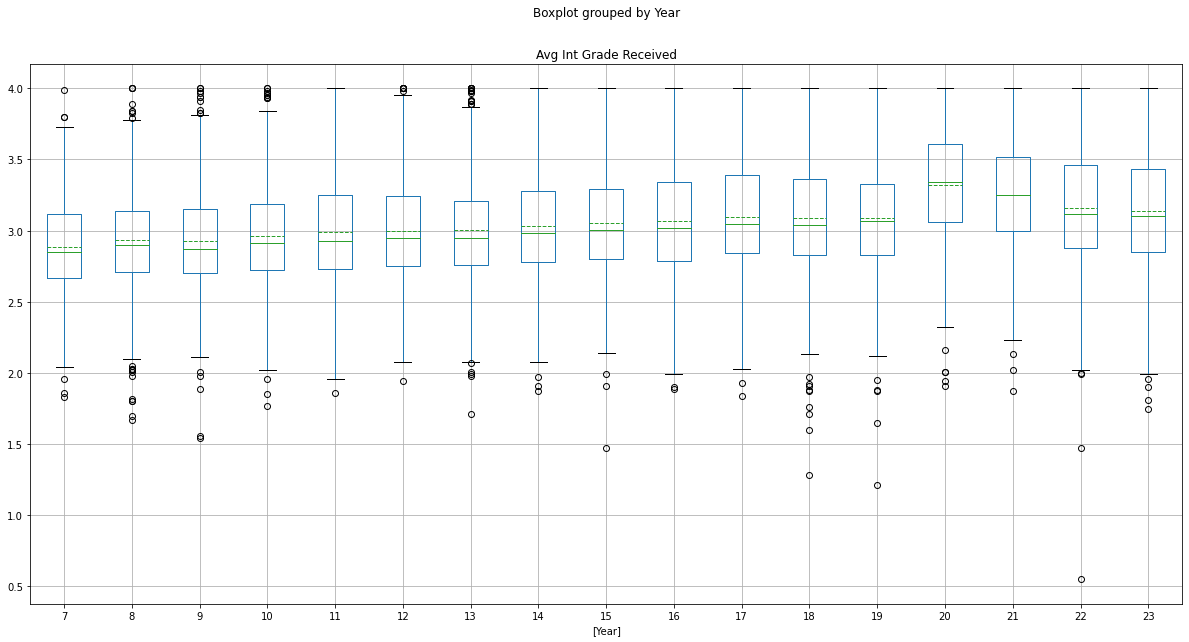

In [238]:
STEM_YEAR = STEM_CAPE[['Avg Int Grade Received','Year']]
STEM_TREND = STEM_YEAR.boxplot(by='Year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True, return_type='axes', figsize = (20, 10))


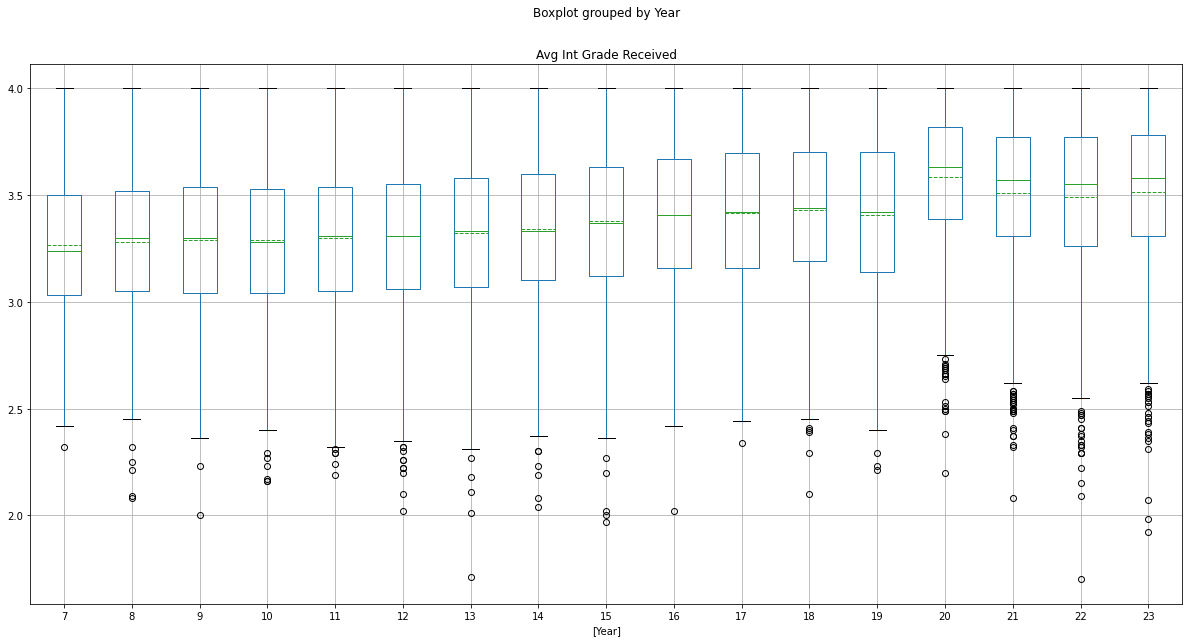

In [239]:
HUM_YEAR = HUM_CAPE[['Avg Int Grade Received','Year']]
HUM_TREND = HUM_YEAR.boxplot(by='Year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True, return_type='axes', figsize = (20, 10))

Upon examination, it's clear that HUM holds a greater mean average of grades as well as having a broader distribution of grades in comparison to STEM. It can be surmised then, that within HUM departments, there could be a lean towards more labor based grading practices which could be a reflection of standards or teaching approaches. To investigate further, we can look at grade inflation trends over time - or the consistent increase in average grades over successive years, which may suggest a shift in evaluation criteria.

In [240]:
GPA_List_S = STEM_GRA['Avg Int Grade Received'].tolist()
GPA_Inflation_S = []
GPA_Inflation_S.append(0)
base = GPA_List_S[0]
for i in range(1,len(GPA_List_S)):
    Rate  = ((GPA_List_S[i] - base)/base)*100
    GPA_Inflation_S.append(Rate)
    base = GPA_List_S[i]

STEM_GRA['Inflation'] = GPA_Inflation_S

In [241]:
GPA_List_H = HUM_GRA['Avg Int Grade Received'].tolist()
GPA_Inflation_H = []
GPA_Inflation_H.append(0)
base = GPA_List_H[0]
for i in range(1,len(GPA_List_H)):
    Rate  = ((GPA_List_H[i] - base)/base)*100
    GPA_Inflation_H.append(Rate)
    base = GPA_List_H[i]

HUM_GRA['Inflation'] = GPA_Inflation_H

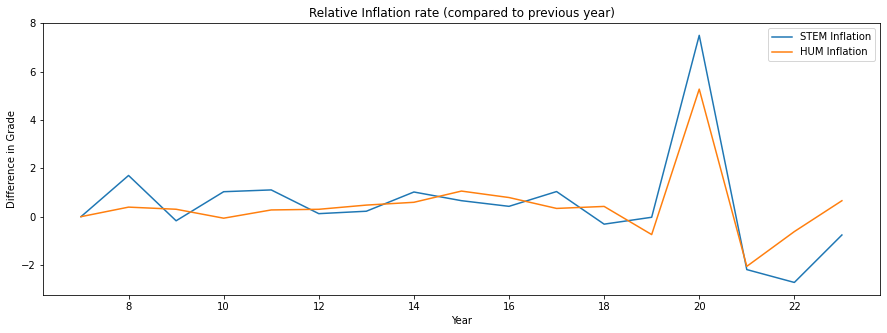

In [242]:
STEM_GRA.groupby(['Year'])['Inflation'].mean().plot(figsize = (15, 5), label="STEM Inflation")
HUM_GRA.groupby(['Year'])['Inflation'].mean().plot(figsize = (15, 5),label="HUM Inflation")
plt.xlabel("Year")
plt.ylabel("Difference in Grade")
plt.title("Relative Inflation rate (compared to previous year)")
plt.legend()

This plot allows us to investigate the inflation of grades between 2007 and 2023, highlighting the differences between STEM and HUM. Despite HUM showing higher overall grades than STEM, the plot implies that there is no significant difference in the rate of inflation of grades. Thus, we can conclude that it isn't one particular group (Humanities vs STEM) that drives inflation but in fact it is the gradual growth of grades overall that drives up GPAs for students from 2007 to 2023. 

### Grade Inflation: Expected and Recieved Grades

Now we turn to look at the student's expected and actual grades to determine if there is a similar trend of grade inflation. If we see expected grades of students increasing at the same rate as grade inflation, we could make assumptions that perhaps it is students' high expectations of themselves and in professors that are driving grades up. 

In [244]:
Mean_Average_Grade_Exp = pd.DataFrame()
Mean_Average_Grade_Exp['Expected'] = average_grade_exp_df.groupby(['Year'])['Avg Int Grade Expected'].mean().tolist()
Expected = Mean_Average_Grade_Exp['Expected'].tolist()
actual_df = average_grade_df.groupby(['Year'])['Avg Int Grade Received'].mean()
Actual = average_grade_df.groupby(['Year'])['Avg Int Grade Received'].mean().tolist()
rate = []
for i in range(0,len(Actual)):
    rate.append(Expected[i] - Actual[i])
Mean_Average_Grade_Exp["Difference"] = rate
rate = []
for i in range(0,len(Actual)):
    rate.append(Actual[i])
Mean_Average_Grade_Exp["Actual"] = rate

Mean_Average_Grade_Exp


,Expected,Difference,Actual
0,3.457692,0.281891,3.175800
1,3.504024,0.260183,3.243841
2,3.514741,0.260892,3.253849
3,3.488848,0.222751,3.266097
4,3.514064,0.213469,3.300595
5,3.523829,0.207066,3.316763
6,3.535229,0.184796,3.350433
7,3.556961,0.187598,3.369363
8,3.550737,0.159949,3.390788
9,3.536685,0.130697,3.405988


Text(0.5, 1.0, 'Expected Grades VS Actual Grades')

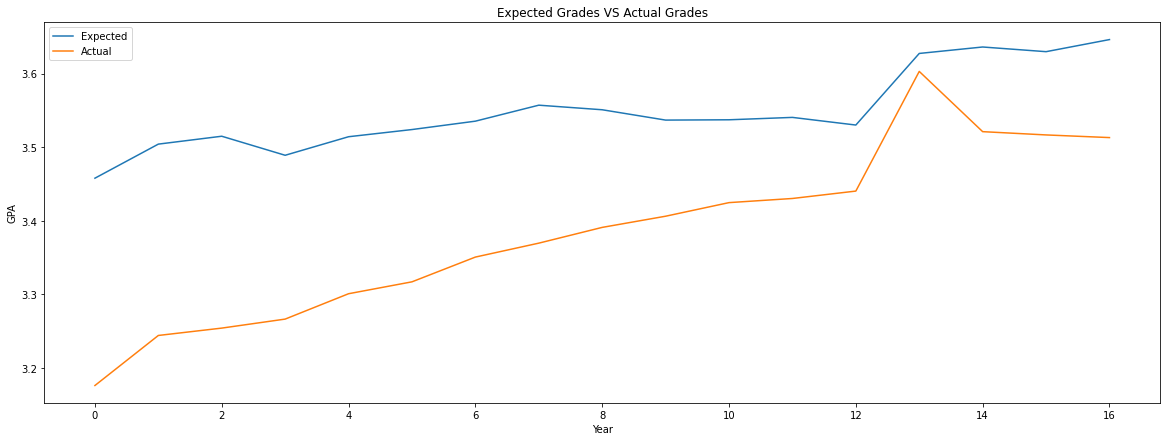

In [245]:
selected_columns = ['Expected', 'Actual']
Mean_Average_Grade_Exp[selected_columns].plot(figsize=(20, 7))
plt.xlabel("Year")
plt.ylabel("GPA")
plt.title("Expected Grades VS Actual Grades")

With this graph we are able to see a clear difference between the expected grades for students and recieved grades for students in that expected grades are always higher than the recieved grades. We can see the difference between expected and recieved grades become smaller as the years progress, especially during 2020 (this may be an affect of the COVID-19 pandemic). From this graph, we can see that is isn't expected grades causing grade inflation especially since high expected grades have been consistently high. 


For a better picture into the relationship between the average expected and actual grades yearly, we can use linear regression and a p-test to see how correlated these variables are. We use linear regression in this situation because we want to examine the linear relationship between these variables and understand if we can use one to predict the other.

In [286]:
y = Mean_Average_Grade_Exp['Actual']

x = Mean_Average_Grade_Exp['Expected']

x1 = sm.add_constant(y)



res_1 = sm.OLS(x, x1).fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     70.38
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           4.77e-07
Time:                        01:31:25   Log-Likelihood:                 40.612
No. Observations:                  17   AIC:                            -77.22
Df Residuals:                      15   BIC:                            -75.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1021      0.173     12.183      0.000       1.734       2.470
Actual         0.4276      0.051      8.389      0.000       0.319       0.536
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   0.667
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.355
Skew:                          -0.073   Prob(JB):                        0.837
Kurtosis:                       2.307   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this analysis, we can see that there is a statistically significant relationship between the expected grades and the real grades given to the students from 2007 to 2023. Since the p-test shows a result of 0, we can reject the null-hypothesis and go with the alternative hypothesis which was that there is a relationship between these variables. In addition, by looking at the R-squared value, we can see that there is a strong relationship between these two variables since the highest value that R can be is 1. 

Now that we know that these variables have a strong relationship, we can think about how it related to grade inflation. From our results, we can't exactly prove that having a higher grade expectation is what CAUSES grade inflation but the increase in grade expectations show that grade inflation does exist at UCSD. Perhaps, it is these expectations that drive students to work harder and thus get the grade they desire or push professors towards matching these expectations. 

### Grade Inflation: Recommended Prof Humanities vs Recommended Prof STEM

Now, we turn our attention to the quality of professors to determine if there is a relationship between grade inflation and recommendations that professors get. 
The dataset includes a column labeled 'Percentage Recommended Professor', which seems to reflect students' recommendations of professors. However, the data is currently stored as objects and thus hinders analysis by quantitative means. Therefore, we want to convert the values to a numerical format in order to calculate them..

To accomplish this, we will develop a function to convert the percentage values into numerical representations - allowing us to quantify students' recommendations of professors.

In [246]:
def normalize_recommend_prof_col(object):
    object = pd.to_numeric(object.replace('%', ''))
    return object

drop_empty['Percentage Recommended Professor'] = drop_empty['Percentage Recommended Professor'].apply(lambda x: normalize_recommend_prof_col(x))

In [247]:
drop_empty.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Avg Int Grade Received,Year,Department,Avg Int Grade Expected
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0,2.80,A- (3.84),B+ (3.67),3.67,23,AAS,3.84
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0,2.50,A- (3.86),A- (3.92),3.92,23,AAS,3.86
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3,3.83,B+ (3.50),B (3.07),3.07,23,ANAR,3.50
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0,5.17,A (4.00),A (4.00),4.00,23,ANAR,4.00
5,Hrvoj Mihic Branka,ANBI 111 - Human Evolution (A),SP23,22,4,100.0%,100.0,2.50,A (4.00),B- (2.95),2.95,23,ANBI,4.00


Now you can see that we have all numbers in the percentage recommended professor column.

Then we want to take a look at the average percentage recommended professor for both hum classes and stem classes.

In [248]:
STEM_CAPE['Percentage Recommended Professor'] = STEM_CAPE['Percentage Recommended Professor'].apply(lambda x: convert_to_num(x))

In [249]:
HUM_CAPE['Percentage Recommended Professor'] = HUM_CAPE['Percentage Recommended Professor'].apply(lambda x: convert_to_num(x))

In [250]:
average_recom_prof_stem = STEM_CAPE['Percentage Recommended Professor'].mean()
average_recom_prof_hum = HUM_CAPE['Percentage Recommended Professor'].mean()
print("Average percentage recommended professor in stem classes: ",average_recom_prof_stem)
print("Average percentage recommended professor in hum classes: ", average_recom_prof_hum)

Average percentage recommended professor in stem classes:  84.64322854715378
Average percentage recommended professor in hum classes:  90.60267686424474


From here, we can see that the average percentage of recommended professor is higher in hum classes than stem classes.

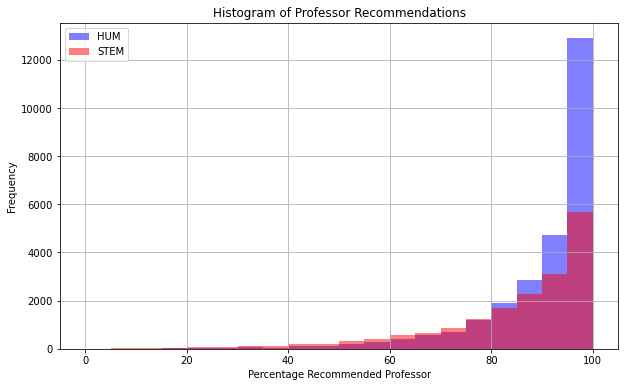

In [251]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot histogram for HUM classes
HUM_CAPE['Percentage Recommended Professor'].hist(alpha=0.5, bins=20, label='HUM', color='blue')

# Plot histogram for STEM classes
STEM_CAPE['Percentage Recommended Professor'].hist(alpha=0.5, bins=20, label='STEM', color='red')

# Adding plot title and labels
plt.title('Histogram of Professor Recommendations')
plt.xlabel('Percentage Recommended Professor')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Based on the histogram, it appears that professors in both humanities (HUM) and STEM fields generally receive high recommendation percentages from students, with a right-skewed distribution indicating that most professors are well-recommended. Notably, humanities professors tend to have a larger proportion of near-perfect recommendations, with the peak of the histogram nearing the 100% mark, suggesting that they are particularly well-regarded. In contrast, the STEM field shows a broader spread and slightly lower peak, indicating more variability in student recommendations. This implies that while highly recommended professors are present in STEM, they do not dominate to the same extent as in the humanities. The overall trend suggests that humanities professors may engage or resonate with students in a manner that prompts a higher rate of strong recommendations, though further detailed analysis would be necessary to draw more definitive conclusions about the factors contributing to these observations.

To determine if there is a difference between the recommended professors' percentages between hum and stem classes, we can use a t-test.

In [252]:
from scipy.stats import ttest_ind

hum_percentages = HUM_CAPE['Percentage Recommended Professor'].dropna().values
stem_percentages = STEM_CAPE['Percentage Recommended Professor'].dropna().values

# Perform the t-test
t_stat, p_val = ttest_ind(hum_percentages, stem_percentages)

# t_stat is the calculated t-statistic, and p_val is the p-value
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpret the p-value
alpha = 0.05
if p_val < alpha:
    print("We reject the null hypothesis. There is a significant difference between groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between groups.")


T-statistic: 43.181335461467405
P-value: 0.0
We reject the null hypothesis. There is a significant difference between groups.


Based on the results obtained from the t-test, with a T-statistic of 35.9345 and an extremely small p-value (1.806e-273), we can confidently reject the null hypothesis. This indicates that there is a statistically significant difference between the percentages of professors recommended in humanities (HUM) classes compared to STEM classes. Specifically, the large positive T-statistic suggests that the average percentage of professors recommended is higher in HUM classes than in STEM classes. 

The significance of this difference underlines the potential influence of professor recommendations on students' perceptions and potentially their choices between HUM and STEM courses. This could reflect differences in teaching styles, course content, or student engagement across these disciplines. Further investigation into the factors contributing to higher professor recommendations in humanities classes could provide valuable insights for enhancing educational practices across all disciplines.

Then I want to use a correlation test to see if the recommended professor percentage is strong impacting the recieved grades from the students.

In [253]:
from scipy.stats import pearsonr
import numpy as np
grades = drop_empty['Avg Int Grade Received'].values  
percentage_recommended_professor = drop_empty['Percentage Recommended Professor'].values

# Remove any NaN values from both arrays to ensure equal lengths
valid_indices = ~np.isnan(grades) & ~np.isnan(percentage_recommended_professor)
grades_clean = grades[valid_indices]
percentage_recommended_professor_clean = percentage_recommended_professor[valid_indices]

# Perform the Pearson correlation test
correlation_coefficient, p_value = pearsonr(grades_clean, percentage_recommended_professor_clean)

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.2939132803517709
P-value: 0.0


The Pearson correlation test between the percentage of students recommending their professors and the average grades received across all courses indicates a positive correlation of approximately 0.294, with a statistically significant p-value of 0.0. This suggests that there is a positive, albeit weak, association between how highly students rate their professors and their academic performance across a wide range of courses, not limited to any specific department. The statistical significance of this correlation reinforces the idea that the quality of teaching, as perceived by students, may have some impact on their grades. However, the correlation's relatively low magnitude highlights that professor recommendations are just one of many factors influencing academic outcomes. This suggests that while positive perceptions of instructors can be associated with slightly better academic performance, they are far from the only determinant of student success. Other variables, such as study habits, course content, and student motivation, likely play more substantial roles in shaping educational achievements.


The analyses conducted have provided illuminating insights into the relationship between professor recommendations, course discipline (HUM vs. STEM), and student grades. A key finding from our investigation is the statistically significant difference in professor recommendation percentages between humanities and STEM classes, with humanities professors generally receiving higher recommendations. This distinction suggests that students might perceive or experience teaching quality differently across these two broad areas of study.

However, when examining the broader impact of professor recommendations on student grades across all courses, the correlation, while positive, is not particularly strong. This indicates that while students may appreciate and recommend professors more in certain contexts (notably in humanities courses), these recommendations do not strongly predict the grades students receive. This finding challenges the assumption that higher professor recommendation rates directly correlate with improved student performance, underscoring the complexity of educational outcomes and the myriad factors that contribute to academic success.

Given the distinct patterns observed between HUM and STEM classes in terms of professor recommendations, we proceeded to conduct separate correlation analyses for each discipline. The goal was to determine whether the strength of the relationship between professor recommendations and student grades varied significantly when these fields were examined independently. Such an analysis is crucial for understanding whether the broader trends observed hold true within the specific contexts of humanities and STEM education, or if different dynamics are at play that could inform targeted strategies for enhancing teaching effectiveness and student engagement in these areas.

In [254]:
# Prepare data for STEM classes
stem_grades = STEM_CAPE['Avg Int Grade Received'].dropna().values
stem_prof_rec = STEM_CAPE['Percentage Recommended Professor'].dropna().values

# Calculate Pearson correlation coefficient for STEM classes
stem_correlation_coefficient, stem_p_value = pearsonr(stem_grades, stem_prof_rec)

# Prepare data for HUM classes
hum_grades = HUM_CAPE['Avg Int Grade Received'].dropna().values
hum_prof_rec = HUM_CAPE['Percentage Recommended Professor'].dropna().values

# Calculate Pearson correlation coefficient for HUM classes
hum_correlation_coefficient, hum_p_value = pearsonr(hum_grades, hum_prof_rec)

(stem_correlation_coefficient, stem_p_value), (hum_correlation_coefficient, hum_p_value)

((0.23169971685196852, 7.824610533240477e-214), (0.26816148128126777, 0.0))

Based on the correlation test results, we observe a positive correlation between the percentage of professors recommended and the average grades received in both humanities (HUM) and STEM classes. The correlation coefficient for HUM classes is approximately 0.197 with a highly significant p-value (5.008e-98), indicating a weak but statistically significant positive relationship. For STEM classes, the correlation coefficient is stronger at about 0.288, also with a highly significant p-value (1.183e-141), suggesting a moderate positive relationship.

These findings imply that while the overall percentage of professors recommended is significantly higher in HUM classes compared to STEM classes, the influence of professor recommendations on student grades exhibits a positive trend in both fields, albeit more pronounced in STEM. The weak to moderate correlation coefficients indicate that professor recommendations contribute to but are not the sole determinant of student academic performance. Other factors, such as individual student effort, course difficulty, and teaching methods, likely play a more significant role in determining grades. Nonetheless, the statistically significant correlations suggest that positive perceptions of professors are associated with better academic outcomes to some extent in both humanities and STEM disciplines.

These results underscore the importance of quality teaching and the potential impact of positive student-teacher interactions on academic success. They also highlight the need for further research into the various factors influencing student grades and the role of professor recommendations in enhancing educational experiences across different academic fields.

### Grade Inflation vs Hours Studied Per Week

In this analysis we hope to see if there is a similar relationship between hours studied per week and grade inflation. If there is a relationship, then we know that students get higher grades for the courses the are studying for the most. 

Text(0.5, 1.0, 'Average Hours Studied Weekly Per Year')

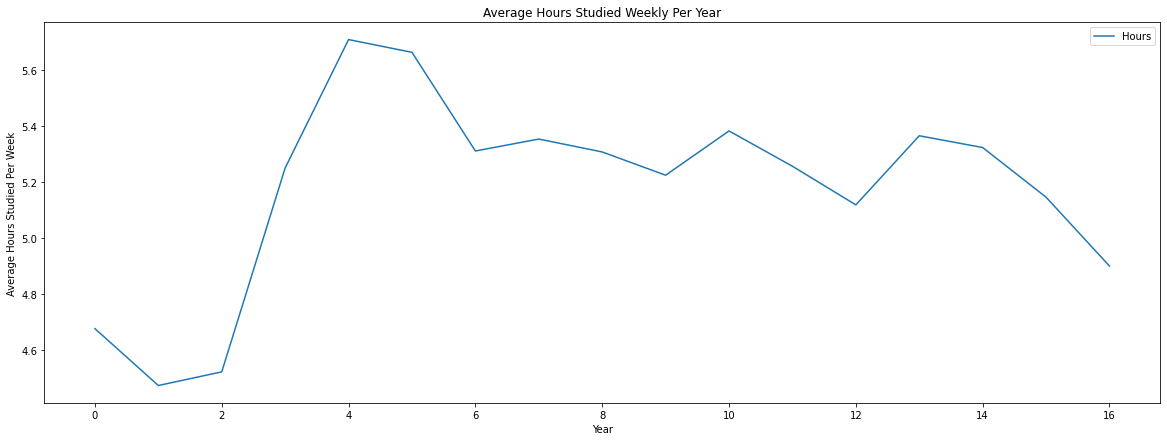

In [287]:
Mean_Average_Hours = pd.DataFrame()
Mean_Average_Hours["Hours"] = average_hours_studied.groupby(['Year'])['Study Hours per Week'].mean()
Mean_Average_Hours
Mean_Average_Hours.plot(figsize=(20, 7))
plt.xlabel("Year")
plt.ylabel("Average Hours Studied Per Week")
plt.title("Average Hours Studied Weekly Per Year")

To figure out if there is a relationship between the number of hours studied per week for a class and the grade given for that class we will use Linear Regression and OLS. Our null hypothesis in this situation would be that there is no relationship between the number of hours studied for a class the grade recieved. In contrast, the alternative hypothesis is that there is a relationship between those two variables. 

In [284]:
y = Mean_Average_Grade_Exp['Actual']

x = Mean_Average_Hours["Hours"]

x1 = sm.add_constant(y)



res_1 = sm.OLS(x, x1).fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.105
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.167
Time:                        01:19:54   Log-Likelihood:                -4.6064
No. Observations:                  17   AIC:                             13.21
Df Residuals:                      15   BIC:                             14.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5992      2.467      0.648      0.527      -3.658       6.857
Actual         1.0569      0.729      1.451      0.167      -0.496       2.610
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.114
Skew:                           0.063   Prob(JB):                        0.944
Kurtosis:                       2.618   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By running OLS and viewing the summary, we can see that these two variables (average hours studied and average grade given yearly) have little to no relationship. Form the R-squared value we can see only 12.3% variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression and our analysis shows that we are far from 1. 

In addition, the P-value being quite large (much greater than .5) shows that we must keep the null hypothesis that explains that there is no relationship between the two variables. 

Thus, from this analysis we can see that grade inflation CAN NOT be explained by the average number of hours studied for a class which was quite surprising to us. Our analysis on this topic is quite limited because the null hypothesis was kept in this situation however it is important to note how this result may diverge from previous beliefs. Often students believe that the more they work toward a grade, the higher they will score. This result diverges from that belief since grades continue to trickle upward while the number of hours students study fluctuates throughout the years. 

# Ethics & Privacy

There are very minimal ethics and privacy concerns related to this dataset since there is no personal information about the student's individual grades available on the dataset.

There may be a slight bias in who composes the data because the students who fill out CAPES are already more willing to participate in the class for extra credit. The grade expected and the grade recieved are different because the people who fill out capes are a different section than the overall class demographic. While this selection bias exists in the dataset, we don't suspect it having a large affect on the conclusions made by our research. This reason why this is the case is because we are studying an overall trend of growth or decay in grades. If this bias where to exist, then it would exist in every year that we analyze CAPES so ranges would be uneffected by this bias.

We will communitcate these specfic biases that we find when discussing our analysis to inform readers about this potential issue.

There are no other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact. There is little our project can do to fix any issues however we will mention these issues to highlight them to the reader.

# Discusison and Conclusion

**Discussion:**

Our research question delves into the phenomenon of grade inflation at the University of California, San Diego (UCSD) over the past 15 years, specifically focusing on whether certain departments exhibit more pronounced grade inflation trends than others. We aim to analyze the average grades awarded within departments to discern any patterns indicative of grade inflation. Grade inflation is a critical issue in academia as it can impact students' perceptions of effort and achievement, as well as their preparedness for the workforce. Moreover, it can influence institutional reputations and the value of academic credentials.

Prior studies have highlighted the prevalence of grade inflation nationally and its potential consequences. While some research suggests a general rise in grades across institutions, specific departmental-level analyses are scarce, particularly for universities like UCSD. Existing data indicates a gradual increase in the university's overall average GPA from 2007 to 2023, but the specific departmental contributions to this trend remain unclear. Furthermore, the factors driving grade inflation, such as institutional competition and the impact of online resources, warrant further investigation.

Our hypothesis posits that grade inflation, particularly in the humanities departments, has become more pronounced at UCSD. This conjecture is informed by observations of similar trends in other prestigious universities and the increased availability of online resources facilitating academic performance. We anticipate that humanities courses, which often prioritize qualitative assessments and subjective evaluations, may exhibit higher average grades over time compared to STEM disciplines.

To investigate these hypotheses, we employ the UCSD CAPEs dataset, which contains comprehensive evaluations of courses and instructors by students. By analyzing variables such as average grade received, study hours per week, and departmental distinctions, we aim to discern patterns indicative of grade inflation. Data preprocessing involves standardizing grade representations and organizing courses by department for comparative analysis.

**Conclusion:**

As our hypothesis suggests, we can see that grade inflation does exist at UCSD however our hypothesis that the humanities department is the driving factor for this inflation is partially incorrect. From our analysis we determined that there is similar inflation in the humanities and STEM departments, the only difference in the trends being in the last year. Thus, we do analysis using other information from the CAPES dataset like professor recommendation and even expected grades. While we see that expected grades are supposedly much higher than recieved grades, since 2020 this difference between the two has decreased, for reasons difficult to pinpoint but could be correlated with finals being online or more resources to use as study tools. Finally, we look at professor recommendation and grade inflation and look at this data on a departmental level (Humanities vs STEM). Using a t-test, we can see there is a relationship between these two which may be related to grade inflation at UCSD. 

In summary, our research seeks to address a critical gap in understanding the dynamics of grade inflation at UCSD, particularly at the departmental level. By leveraging the UCSD CAPEs dataset and using detailed data analysis techniques, we aim to reveal the prevalence and drivers of grade inflation within specific academic disciplines. Our findings have implications for both academic policy and changes in teaching style (especially during the peak of Covid-19 with many classes being taught online), as well as broader discussions on educational equity and integrity. Ultimately, by describing the factors and complexities of grade inflation, we contribute to informed decision-making and accountability within higher education institutions.


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.

-Sirui Huang:

-Tianqi Li:

-Jacob McCoy: Helped come up with ideas for proposal, research, hypothesis, and other factors related to what to focus on for EDA.  Edited, cleaned, and added onto analysis of data. Served as second check for portions EDA and data checkpoint sections.  

-Shreya Nagunuri: Wrote the code on creating department category and cleaning up the grades and years in order to use properlly for other analysis. Wrote the code on analyzing the inflation using OLS and slope data in order to see how grade inflation progressed yearly. Wrote analysis on each of the different graphs on expected and recieved grades and humanities vs stem inflations. Discussed about the ethics and, data overview, and previous works sections to give readers a proper understanding of what has already been done. Made decisions on what departments are statistically significant and helped discuss ideas for the proposal. In addition, did all of the linear regression work to understand the relationships between variables. 

-Juliet Raynovich: Wrote some code to compare departments with each other in data, based off imported kaggle information and divided between the humanities and STEM departments. Helped come up with ideas for the proposal, research, and hypothesis and certain factors to focus on in each dataset including # of evaluations filled out vs how many grades were recorded. Wrote the conclusion/ discussion and cleaned up some code and titles of sections from previous data checkpoints.